In [29]:
using XLSX
using DataFrames
using CSV
using StatsBase
using Plots

# 第2章 データの扱い方

## 1. データを整理して情報を読み取る

In [28]:
ifn = "../data/csv/2-1.csv"
df = CSV.read(ifn, DataFrame)

Row,no,score
,Int64,Int64
1,1,59
2,2,78
3,3,95
4,4,46
5,5,38
6,6,56
7,7,68
8,8,64
9,9,58


In [30]:
hist = fit(Histogram, df[!, :score])

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  20.0:10.0:100.0
weights: [2, 4, 5, 7, 10, 5, 4, 3]
closed: left
isdensity: false

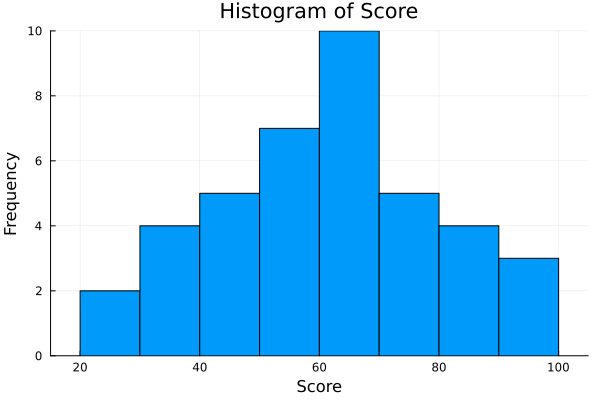

In [34]:
plot(hist, xlabel="Score", ylabel="Frequency", title="Histogram of Score"; legend=false)

In [36]:
function my_mean(v)
    total = 0
    for i in v
        total += i
    end
    total / length(v)
end

my_mean (generic function with 1 method)

In [46]:
function my_variance(v)
    m = my_mean(v)
    total = 0
    for i in v
        total += (i - m)^2
    end
    total / length(v)
end

my_variance (generic function with 1 method)

In [52]:
function my_variance2(v)
    m = my_mean(v)
    total = 0
    for i in v
        total += (i - m)^2
    end
    total / (length(v) - 1)
end

my_variance2 (generic function with 1 method)

In [47]:
my_mean(df.score)

62.45

In [48]:
my_variance(df.score)

333.3475

In [53]:
my_variance2(df.score)

341.89487179487185

In [49]:
my_variance([200, 0])

10000.0

In [50]:
function my_sqrt(v)
    sqrt(my_variance(v))
end

my_sqrt (generic function with 1 method)

In [56]:
function my_sqrt2(v)
    sqrt(my_variance2(v))
end

my_sqrt2 (generic function with 1 method)

In [51]:
my_sqrt(df.score)

18.257806549528343

In [57]:
my_sqrt2(df.score)

18.490399449305357

## 2. 観測されたデータから全体の傾向を知るには?

## 3. 2つの事柄の関係を調べる

In [81]:
function my_covariance(v, w)
    vm = my_mean(v)
    wm = my_mean(w)
    total = 0
    for d in zip(v, w)
        total += (d[1] - vm) * (d[2] - wm)
    end
    total / length(v)
end

my_covariance (generic function with 1 method)

In [82]:
function my_correlation(v, w)
    my_covariance(v, w) / (sqrt(my_variance(v)) * sqrt(my_variance(w)))
end

my_correlation (generic function with 1 method)

In [83]:
function my_covariance2(v, w)
    vm = my_mean(v)
    wm = my_mean(w)
    total = 0
    for d in zip(v, w)
        total += (d[1] - vm) * (d[2] - wm)
    end
    total / (length(v) - 1)
end

my_covariance2 (generic function with 1 method)

In [84]:
ifn = "../data/csv/2-3.csv"
df = CSV.read(ifn, DataFrame)

Row,id,age,income
,Int64,Int64,Int64
1,1,12,480
2,2,16,520
3,3,18,760
4,4,16,620
5,5,12,590
6,6,10,370
7,7,14,690
8,8,16,950
9,9,12,610


In [88]:
my_mean(df.age)

13.8

In [89]:
my_mean(df.income)

607.0

In [92]:
my_variance(df.age)

5.959999999999999

In [93]:
my_variance2(df.age)

6.622222222222222

In [91]:
my_variance(df.income)

24441.0

In [94]:
my_variance2(df.income)

27156.666666666668

In [87]:
my_covariance(df.age, df.income)

263.4

In [85]:
my_correlation(df.age, df.income)

0.6901335732408653

### 実証分析問題

In [96]:
ifn = "../data/csv/2_income.xlsx"
sheetname = "Sheet1"
df = DataFrame(XLSX.readtable(ifn, sheetname))

Row,yeduc,income
,Any,Any
1,9,50
2,9,350
3,9,100
4,9,0
5,9,6.25
6,9,100
7,9,200
8,9,50
9,9,150


In [97]:
my_mean(df.income)

258.1326844262295

In [98]:
my_variance(df.income)

30140.316140858573

In [99]:
my_variance2(df.income)

30147.180252938022

In [100]:
my_mean(df.yeduc)

13.851775956284152

In [101]:
my_variance(df.yeduc)

3.5215177931560047

In [102]:
my_variance2(df.yeduc)

3.522319778533631

In [105]:
my_covariance(df.yeduc, df.income)

80.84742203130166

In [103]:
my_covariance2(df.yeduc, df.income)

80.86583410646251

In [104]:
my_correlation(df.yeduc, df.income)

0.24815745753655216